[0.14634705] [0.56231846]


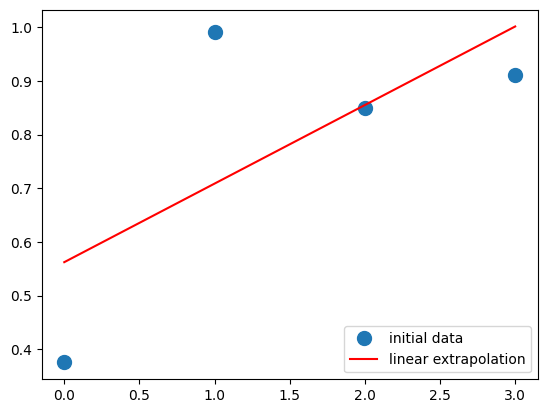

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  

x = np.arange(0, 4)  
y = np.random.random((4, 1))

A = np.vstack([x, np.ones(len(x))]).T  # формируем матрицу дизайна A для линейной регрессии:
                                         # первая колонка — x, вторая — единицы; затем транспонируем,
                                         # чтобы получить массив размера (4,2)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]  # решаем задачу наименьших квадратов
                                             # получаем коэффициенты m (наклон) и c (сдвиг/пересечение)
print(m, c) 

plt.plot(x, y, 'o', label='initial data', markersize=10) 
plt.plot(x, m*x + c, 'r', label='linear extrapolation')  
plt.legend() 
plt.show()

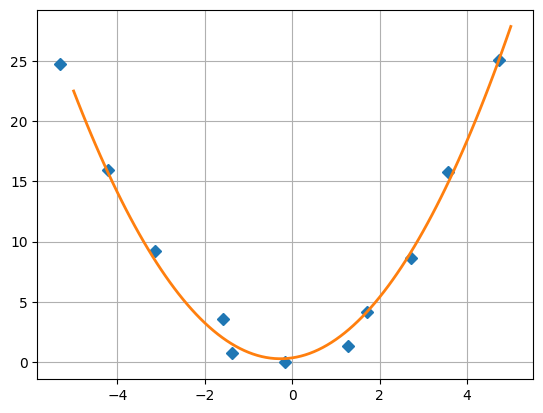

In [22]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1.0
x = np.linspace(-5,5,11)
y = x**2+delta*(np.random.rand(11)-0.5)
x += delta*(np.random.rand(11)-0.5)

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

x = np.fromfile('x_data.txt', float, sep='\n')
y = np.fromfile('y_data.txt', float, sep='\n')

m = np.vstack((x**2, x, np.ones(11))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-5,5,101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 +  s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('parabola.png')

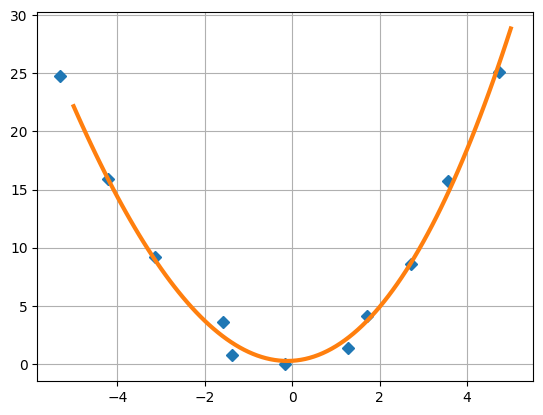

In [23]:
x = np.fromfile('x_data.txt', float, sep='\n')
y = np.fromfile('y_data.txt', float, sep='\n')

m = np.vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-5,5,101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 +  s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('cubic.png')

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


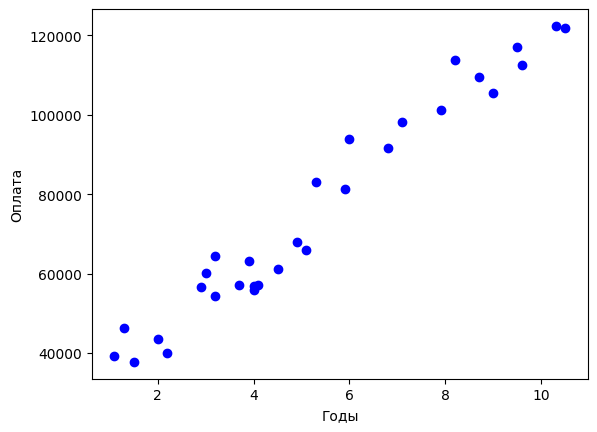

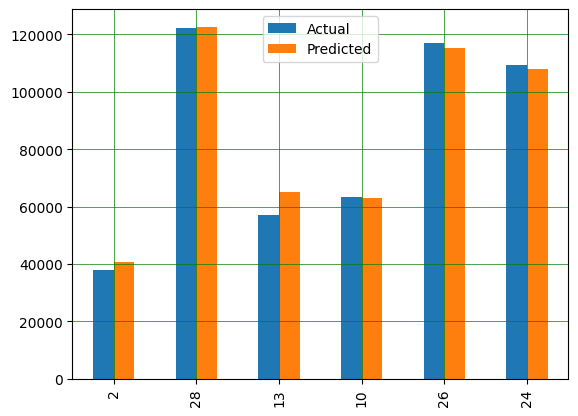

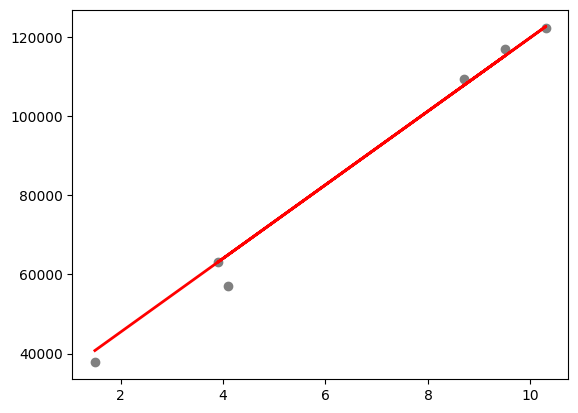

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.DataFrame()
dataset = pd.read_csv(url)
display(dataset.head())
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label = 'Данные опроса')
plt.xlabel('Годы')
plt.ylabel('Оплата')
plt.show()

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
df = DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
dataset = pd.DataFrame()
dataset = pd.read_csv(url)

print(dataset.describe())

X = dataset[[ 'Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)' ]]
y = dataset['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print('\n',coeff_df)

y_pred = regressor.predict(X_test)
df = DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean square error: ', metrics.mean_squared_error(y_test,y_pred)) 

       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.724000          968.000000  


Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

[0.24972951 0.75277575 0.48509064]
0.00020688619260706692
0.10830796648437492


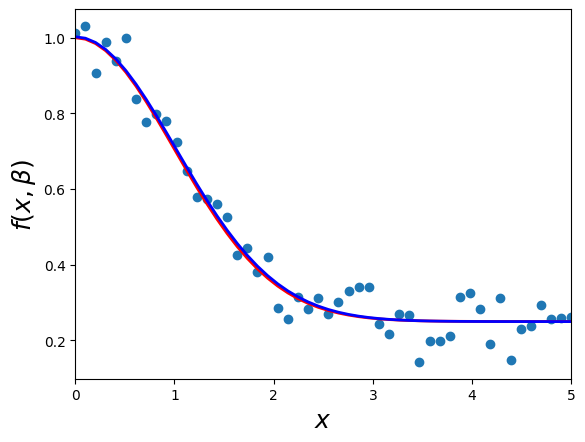

In [151]:
from scipy.optimize import curve_fit

beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2*x**2)

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

Необходимо проверить гипотезу, что нашa точечно заданная функция ложится
на кривые вида:
    1. $f(x,b) = b_0+b_1x$
    2. $f(x,b) = b_0+b_1x+b_2x^2$
    3. $f(x,b) = b_0+b_1\ln(x)$
    4. $f(x,b) = b_0x^{b_1}$ 

[0.32142698 0.33775809]
0.00011399707396678109
0.10023880511618953


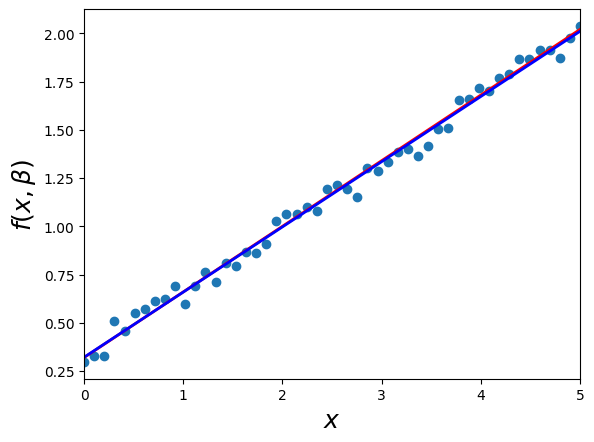

In [165]:
# 1

beta = (0.32, 0.34)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[10.02503202  0.28340423 30.00152987]
0.0001091156994806218
0.09099103760715421


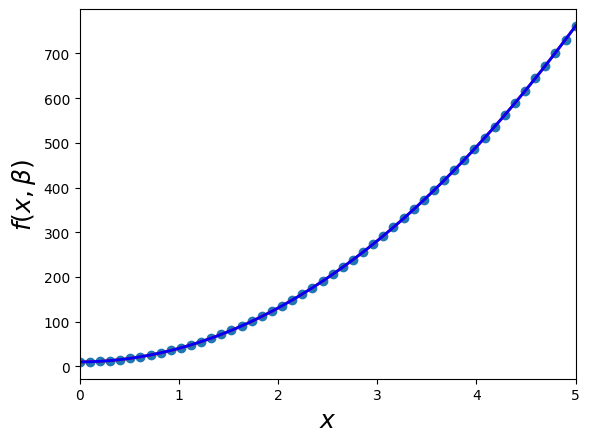

In [202]:
# 2

beta = (10, 0.3, 30)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[10.01035237 99.9983159 ]
2.826494495834662e-05
0.08388460562496089


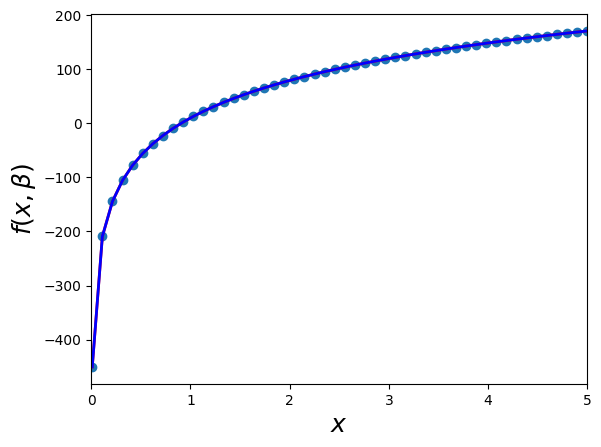

In [243]:
# 3

beta = (10, 100)

def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(0.01,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()